# Исследование данных сервиса аренды самокатов GoFast

***Описание проекта***

В нашем распоряжении данные сервиса аренды самокатов GoFast о пользователях из нескольких городов, а также об их поездках. Необходимо проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

* без подписки:
    - абонентская плата отсутствует;
    - стоимость одной минуты поездки — 8 рублей;
    - стоимость старта (начала поездки) — 50 рублей;

* с подпиской Ultra:
    -  абонентская плата — 199 рублей в месяц;
    -  стоимость одной минуты поездки — 6 рублей;
    -  стоимость старта — бесплатно.
    

***План действий:***

   1. Изучить общую информацию о данных.
   2. Обработать пропуски, дубликаты, аномалии и вбросы в данных.
   3. Провести исследовательский анализ данных: описать и визуализировать общую информацию о пользователях и поездках.
   4. Проверить следующие гипотезы для продакт-менеджмента:
         - тратят ли пользователи с подпиской больше времени на поездки, чем пользователи без подписки;
         - можно ли утверждать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров;
         - будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

### Загрузка данных и изучение общей информации

In [ ]:
# импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
import scipy.stats as st
import numpy as np

####  Считываем CSV-файлы с данными с помощью библиотеки pandas и сохраняем их в датафреймы:

In [ ]:
users_go = pd.read_csv('/datasets/users_go.csv')
rides_go = pd.read_csv('/datasets/rides_go.csv')
subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv')

#### Выведем первые строки каждого набора данных. Изучим общую информацию о каждом датафрейме:

In [ ]:
# создадим функцию для показа общей информации:
def general_information(dataframe):
    display(dataframe.head())
    display(dataframe.info())
    display(dataframe.describe())
    dataframe.hist(figsize=(15, 5))
    plt.show()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

,user_id,age
count,1565.000000,1565.000000
mean,762.633866,24.922045
std,443.260155,4.553496
min,1.000000,12.000000
25%,378.000000,22.000000
50%,762.000000,25.000000
75%,1146.000000,28.000000
max,1534.000000,43.000000


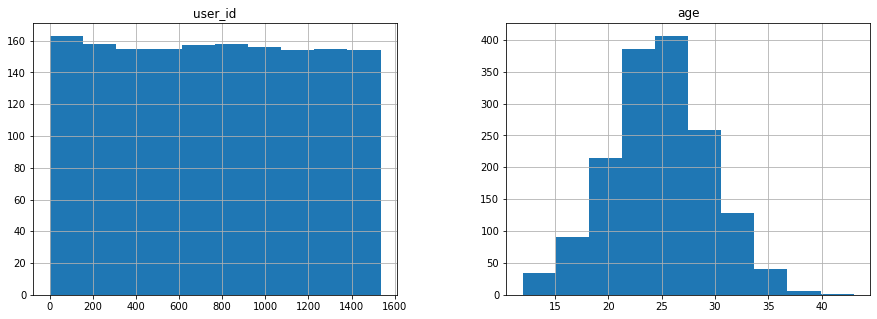

None

In [ ]:
# выведем общую информацию о датасете users_go
display(general_information(users_go))

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None

,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963


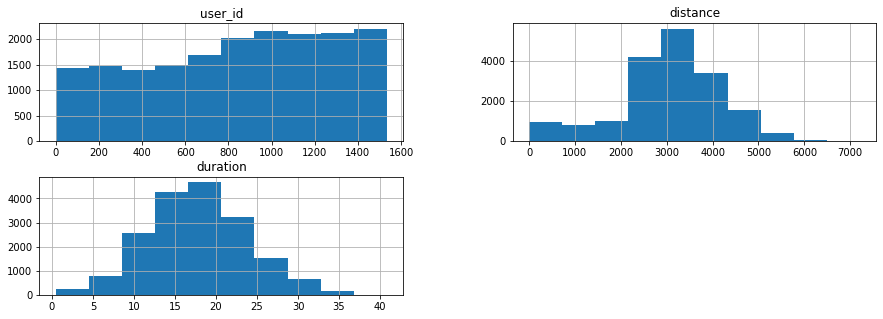

None

In [ ]:
# выведем общую информацию о датасете rides_go
display(general_information(rides_go))

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


None

,minute_price,start_ride_price,subscription_fee
count,2.000000,2.000000,2.000000
mean,7.000000,25.000000,99.500000
std,1.414214,35.355339,140.714249
min,6.000000,0.000000,0.000000
25%,6.500000,12.500000,49.750000
50%,7.000000,25.000000,99.500000
75%,7.500000,37.500000,149.250000
max,8.000000,50.000000,199.000000


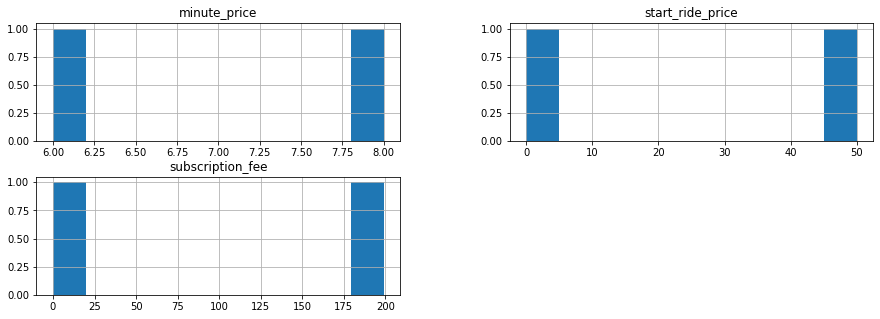

None

In [ ]:
# выведем общую информацию о датасете subscriptions_go
display(general_information(subscriptions_go))

#### Вывод

В нашем распоряжении 3 датасета с информацией о пользователях сервиса аренды самокатов GoFast, о совершаемых ими поездках и о параметрах подписки.

Датасет **`users_go`** содержит 1565 строк и 5 столбцов:
- user_id (уникальный идентификатор пользователя);
- name (имя пользователя);
- age (возраст);
- city (город);
- subscription_type	(тип подписки: free, ultra).

Пропусков и аномальных значений нет.

Датасет **`rides_go`** содержит 18068 строк и 4 столбца:
- user_id (уникальный идентификатор пользователя);
- distance (расстояние, которое пользователь проехал в текущей сессии (в метрах));
- duration (продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»);
- date (дата совершения поездки).

В данных нет пропусков, при этом некоторые столбцы содержат неудобный для анализа тип данных, например, столбец date лучше привести к типу datetime. Cделаем это на этапе предобработки данных.

Датасет **`subscriptions_go`** содержит 2 строки и 4 столбца:
- subscription_type (тип подписки);
- minute_price (стоимость одной минуты поездки по данной подписке);
- start_ride_price (стоимость начала поездки);
- subscription_fee (стоимость ежемесячного платежа).

Датасет носит информационный характер и содержит сравнение использования сервиса аренды самокатов с подпиской 'ultra' и без нее.

### Предобработка данных

#### Приведем столбец date к типу даты:

In [ ]:
rides_go['date'] = pd.to_datetime(rides_go['date'], format = '%Y-%m-%d')
rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


#### Создадим новый столбец с номером месяца на основе столбца date:

In [ ]:
rides_go['month_ride'] = rides_go['date'].dt.month
rides_go.head()

,user_id,distance,duration,date,month_ride
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [ ]:
# проверим, за какой период времени собраны исследуемые данные
display(rides_go['date'].min(), rides_go['date'].max())

Timestamp('2021-01-01 00:00:00')

Timestamp('2021-12-30 00:00:00')

Датасет состоит из данных, собранных за 2021 год.

#### Проверим датафреймы на наличие дубликатов:

In [ ]:
# проверяем датасет users_go на наличие явных дубликатов
display(f'Количество явных дубликатов в датафрейме users_go: {users_go.duplicated().sum()}')

'Количество явных дубликатов в датафрейме users_go: 31'

In [ ]:
# удалим явные дубликаты
users_go = users_go.drop_duplicates().reset_index(drop=True)
display(f'Количество явных дубликатов в датафрейме users_go после очистки: {users_go.duplicated().sum()}')

'Количество явных дубликатов в датафрейме users_go после очистки: 0'

In [ ]:
# проверим наличие дубликатов по параметру 'user_id'
display(f'Количество дубликатов в столбце user_id: {users_go["user_id"].duplicated().sum()}')

'Количество дубликатов в столбце user_id: 0'

In [ ]:
# проверяем датасет rides_go на наличие явных дубликатов
display(f'Количество явных дубликатов в датасете rides_go: {rides_go.duplicated().sum()}')

'Количество явных дубликатов в датасете rides_go: 0'

In [ ]:
# проверяем датасет rides_go на наличие дубликатов по сумме ключевых параметров
display(f'Количество дубликатов в датасете rides_go по сумме ключевых параметров:'\
        f'{rides_go.duplicated(["distance","duration"]).sum()}')


'Количество дубликатов в датасете rides_go по сумме ключевых параметров:0'

#### Вывод
На этапе предобработки данных мы:
* привели столбец date в датафрейме rides_go к типу datetime;
* создали новый столбец в датафрейме rides_go с номером месяца - "month_ride";
* проверили и очистили датафреймы от дубликатов.

### Исследовательский анализ данных

#### Рассмотрим частоту встречаемости городов

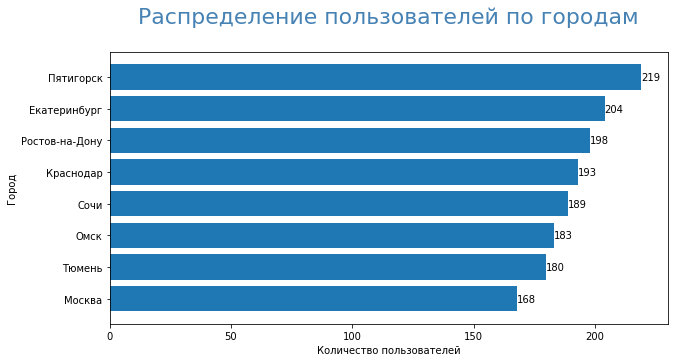

In [ ]:
cities = users_go['city'].value_counts()

# построим барплот
plt.figure(figsize=(10, 5))
plt.barh(cities.index, cities.values)

for i, value in enumerate(cities.values):
    plt.text(value, i, str(value), ha='left', va='center')

plt.xlabel('Количество пользователей')
plt.ylabel('Город')
plt.title('Распределение пользователей по городам'+ "\n", fontsize=22, color='SteelBlue')

plt.gca().invert_yaxis()

plt.show()

Больше всего в выборке представлено пользователей из Пятигорска, Екатеринбурга и Ростова-на-Дону, меньше - из Омска, Тюмени и Москвы.

#### Изучим соотношение пользователей с подпиской и без подписки:

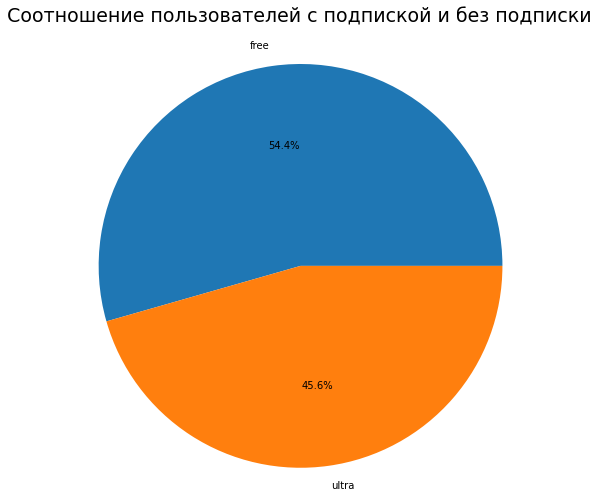

In [ ]:
subscription_types = users_go['subscription_type'].value_counts()
# построим круговую диаграмму
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(subscription_types, labels=subscription_types.index, autopct='%1.1f%%')
plt.title('Cоотношение пользователей с подпиской и без подписки'+ "\n", fontsize=19)
plt.axis('equal')
plt.show()

Доли отличаются примерно на 10%. Преобладают пользователи без подписки - 54.4%.

#### Исследуем возраст пользователей:

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

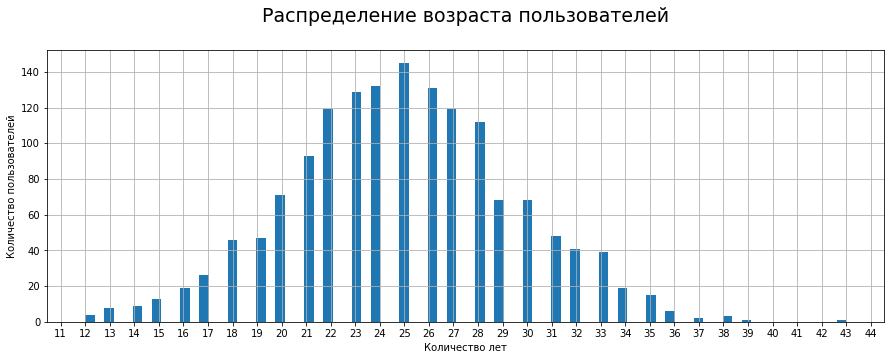

In [ ]:
display(users_go['age'].describe())

# строим гистограмму
users_go.hist(column='age', bins=80, figsize=(15,5))
plt.locator_params(axis='x', nbins=60)
plt.title('Распределение возраста пользователей'+ "\n", fontsize=19)
plt.xlabel('Количество лет')
plt.ylabel('Количество пользователей')
plt.show;

Минимальный возраст пользователей в нашей выборке равен 12 годам, а максимальный - 43 года. Средний возраст пользователей равен 25 годам. Большинству пользователей от 22 до 28 лет.

#### Рассмотрим расстояние, которое пользователь преодолел за одну поездку:

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

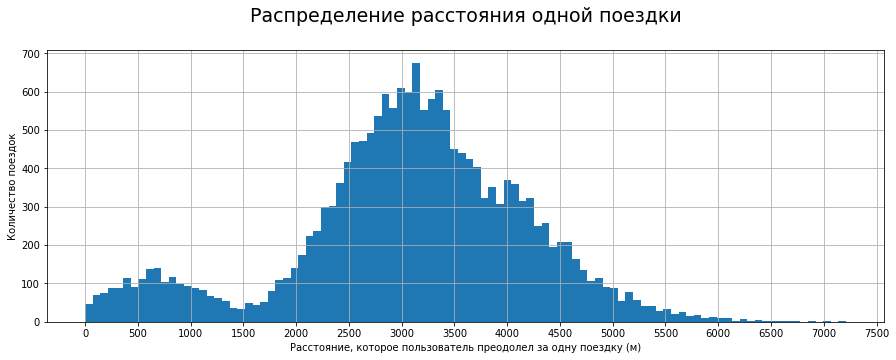

In [ ]:
display(rides_go['distance'].describe())

# строим гистограмму
rides_go.hist(column='distance', bins=100, figsize=(15,5))
plt.locator_params(axis='x', nbins=30)
plt.title('Распределение расстояния одной поездки'+ "\n", fontsize=19)
plt.xlabel('Расстояние, которое пользователь преодолел за одну поездку (м)')
plt.ylabel('Количество поездок')
plt.show;

В основном пользователи за одну поездку проезжают от 2.5 до 4 км. Также на гистограмме виден небольшой пик в районе 500-700 м. В выборке присутствуют значения около 0, скорее всего у пользователя возникли какие-либо проблемы с самокатом сразу после оформления аренды.

#### Изучим продолжительность поездок:

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

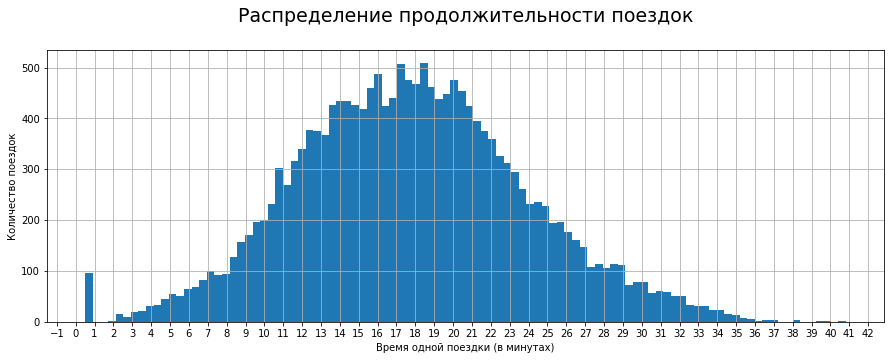

In [ ]:
display(rides_go['duration'].describe())

# построим гистограмму
rides_go.hist(column='duration', bins=100, figsize=(15,5))
plt.locator_params(axis='x', nbins=50)
plt.title('Распределение продолжительности поездок'+ "\n", fontsize=19)
plt.xlabel('Время одной поездки (в минутах)')
plt.ylabel('Количество поездок')
plt.show;

В среднем продолжительность поездки составляет 18 минут, большинство поездок находятся в пределах 13 - 22 минут. Есть также аномально короткие по продолжительности поездки (меньше минуты). Выясним, с чем это связано, на следующем этапе.

### Объединение данных

#### Объединим данные о пользователях, поездках и подписках в один датафрейм:

In [ ]:
df_full = users_go.merge(rides_go, on='user_id')
df_full = df_full.merge(subscriptions_go, on='subscription_type')
display(df_full)

,user_id,name,age,city,subscription_type,distance,duration,date,month_ride,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [ ]:
# сравним количество строк до и после объединения датасетов
display(rides_go.shape, df_full.shape)

(18068, 5)

(18068, 12)

#### Создадим ещё два датафрейма из датафрейма, созданного на этапе 4.1:

In [ ]:
# датафрейм с данными о пользователях без подписки
free_sub = df_full.query('subscription_type == "free"')

# датафрейм с данными о пользователях с подпиской
ultra_sub = df_full.query('subscription_type == "ultra"')

#### Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий:

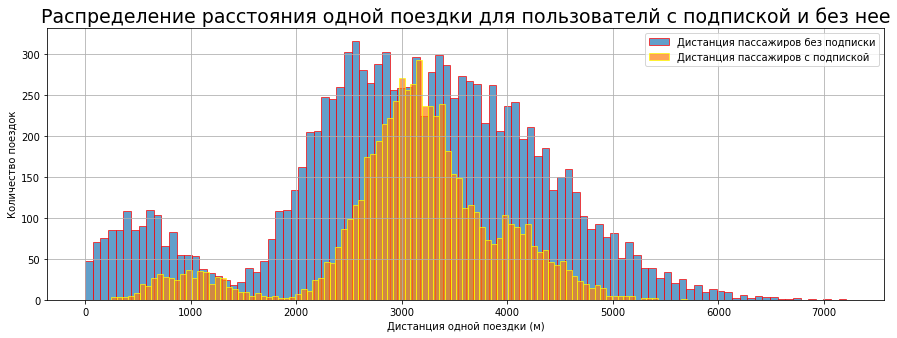

In [ ]:
# построим две скомпонованные гистограммы распределения дистанции поездок для пользователей с подпиской и без нее
plt.figure(figsize=(15, 5))
free_sub['distance'].hist(label='Дистанция пассажиров без подписки', bins=100, alpha=.7, edgecolor='red')
ultra_sub['distance'].hist(label='Дистанция пассажиров с подпиской', bins=100, alpha=.7, edgecolor='yellow')
plt.title('Распределение расстояния одной поездки для пользователй с подпиской и без нее', fontsize=19)
plt.xlabel('Дистанция одной поездки (м)')
plt.ylabel('Количество поездок')
plt.legend()
plt.show()

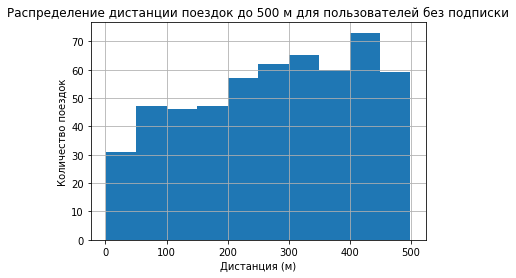

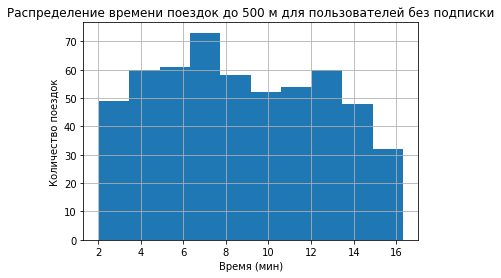

In [ ]:
# построим гистограммы для ултракоротких поездок пассажиров без подписки
free_sub.query('distance < 500').hist(column='distance')
plt.xlabel('Дистанция (м)')
plt.ylabel('Количество поездок')
plt.title('Распределение дистанции поездок до 500 м для пользователей без подписки')

free_sub.query('distance < 500').hist(column='duration')
plt.xlabel('Время (мин)')
plt.ylabel('Количество поездок')
plt.title('Распределение времени поездок до 500 м для пользователей без подписки');

На первой гистограмме видно, что распределения дистанций пользователей с подпиской и без нее отличаются. Пользователи без подписки чаще совершают очень короткие (до 500 м) и очень длинные (свыше 5 км) поездки. Это можно объяснить тем, что их поездки в большинстве случаев ситуативные, тогда как пользователи, имеющие подписку, используют самокаты повседневно для передвижения по заранее разработанным маршрутам, например, чтобы добраться от дома до работы и обратно.

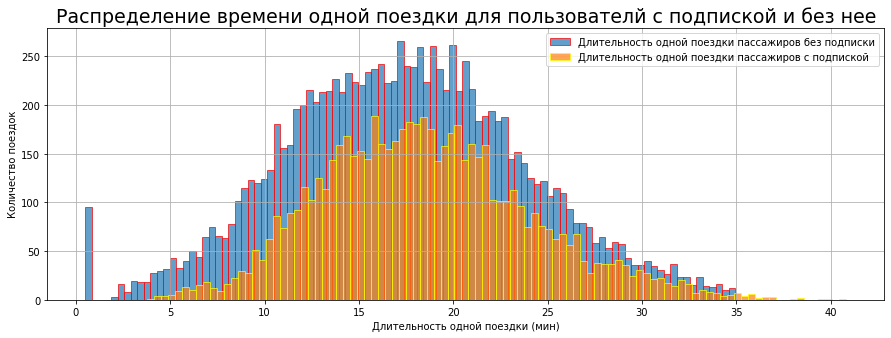

In [ ]:
# построим две скомпонованные гистограммы распределения времени одной поездки для пассажиров с подпиской и без нее
plt.figure(figsize=(15, 5))
free_sub['duration'].hist(label='Длительность одной поездки пассажиров без подписки', bins=100, alpha=.7, edgecolor='red')
ultra_sub['duration'].hist(label='Длительность одной поездки пассажиров с подпиской', bins=100, alpha=.7, edgecolor='yellow')
plt.title('Распределение времени одной поездки для пользователй с подпиской и без нее', fontsize=19)
plt.xlabel('Длительность одной поездки (мин)')
plt.ylabel('Количество поездок')
plt.legend()
plt.show()

Время поездок двух категорий пользователей распределено похоже, но при этом есть и отличие. У пользователей без подписки есть большая доля поездок около 1 минуты, тогда как у пользователей с подпиской таких поездок нет. Изучим эту аномалию.

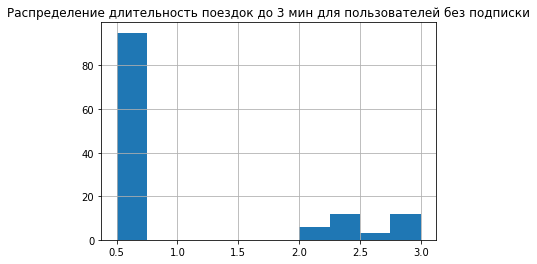

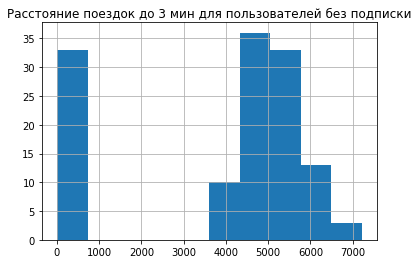

In [ ]:
# построим гистограммы для пользователей без подписки согласно условиям:
free_sub.query('duration < 3').hist(column='duration')
plt.title('Распределение длительность поездок до 3 мин для пользователей без подписки')
free_sub.query('duration < 3').hist(column='distance')
plt.title('Расстояние поездок до 3 мин для пользователей без подписки');

Выделяются данные с длительностью 0.5 мин и дистанцией 4-7 км (проехать такое расстояние за 3 минуты невозможно). Рассмотрим эти данные:

In [ ]:
free_sub.query('duration < 3 & distance > 3000')

,user_id,name,age,city,subscription_type,distance,duration,date,month_ride,minute_price,start_ride_price,subscription_fee
6531,701,Иван,31,Екатеринбург,free,4196.445201,0.5,2021-08-31,8,8,50,0
6570,704,Мирон,29,Ростов-на-Дону,free,4830.824371,0.5,2021-10-14,10,8,50,0
6680,712,Дарья,28,Москва,free,4684.004397,0.5,2021-03-04,3,8,50,0
6695,713,Святослав,30,Краснодар,free,5215.642710,0.5,2021-02-25,2,8,50,0
6768,718,Владислава,31,Москва,free,5197.436649,0.5,2021-02-11,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17004,1460,Жанна,27,Пятигорск,free,5531.335845,0.5,2021-01-19,1,8,50,0
17242,1477,Ян,17,Сочи,free,6724.932981,0.5,2021-01-12,1,8,50,0
17314,1483,Роберт,26,Екатеринбург,free,4445.481070,0.5,2021-03-06,3,8,50,0
17505,1496,Яна,19,Москва,free,5722.551787,0.5,2021-02-14,2,8,50,0


Такие данные выглядят как аномалии и противоречат действительности. Скорее всего в работе программного обеспечения есть ошибка, поэтому необходимо составить баг-репорт для исключения таких аномалий в будущем. Удалим выбросы из используемых далее датасетов  и посмотрим, как изменились рассмотренные ранее показатели:

In [ ]:
# удалим из датасетов free_sub и df_full строки по заданным условиям:
free_sub = free_sub[~((free_sub['duration'] < 3) & (free_sub['distance'] > 3000))]
df_full = df_full[~((df_full['duration'] < 3) & (df_full['distance'] > 3000))]

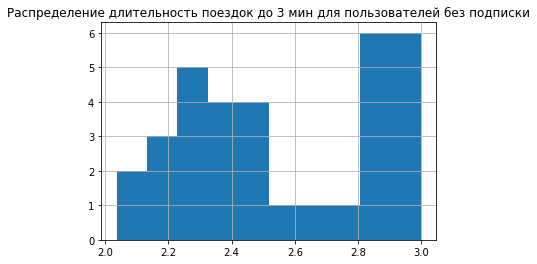

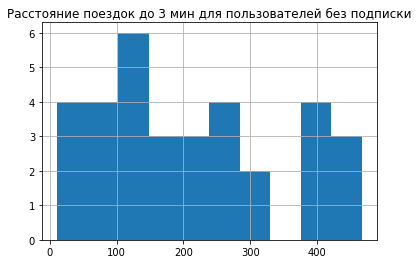

In [ ]:
free_sub.query('duration < 3').hist(column='duration')
plt.title('Распределение длительность поездок до 3 мин для пользователей без подписки')
free_sub.query('duration < 3').hist(column='distance')
plt.title('Расстояние поездок до 3 мин для пользователей без подписки');

In [ ]:
display(f'Изменение возраста пользователей после исключения аномалий:')
df_full['age'].describe()

'Изменение возраста пользователей после исключения аномалий:'

count    17973.000000
mean        24.890169
std          4.583348
min         12.000000
25%         22.000000
50%         25.000000
75%         28.000000
max         43.000000
Name: age, dtype: float64

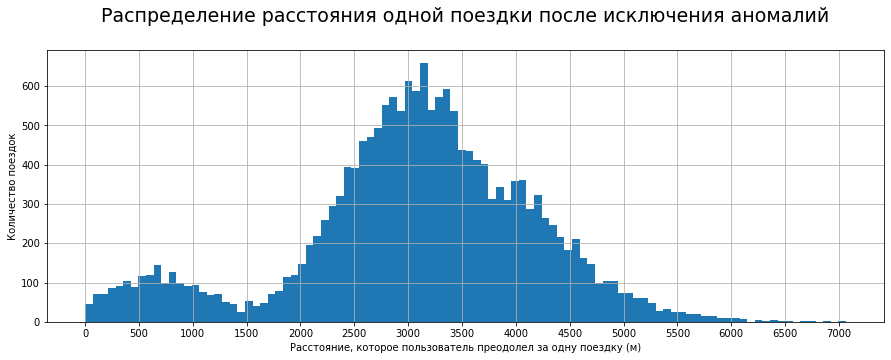

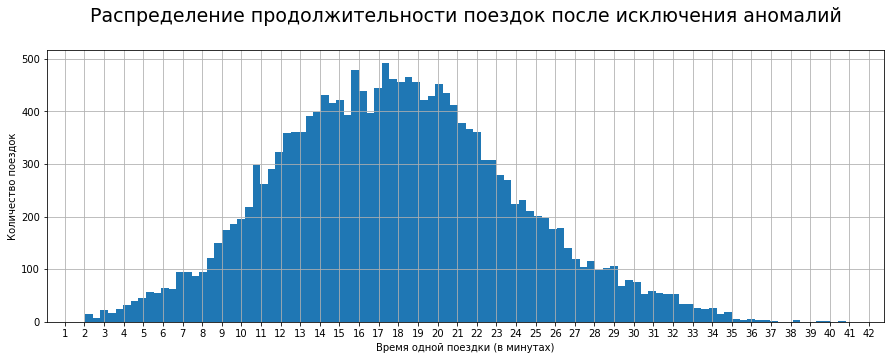

In [ ]:
# проверим совместные распределения дистанции и времени для пользователей с подпиской и без
df_full.hist(column='distance', bins=100, figsize=(15,5))
plt.locator_params(axis='x', nbins=30)
plt.title('Распределение расстояния одной поездки после исключения аномалий'+ "\n", fontsize=19)
plt.xlabel('Расстояние, которое пользователь преодолел за одну поездку (м)')
plt.ylabel('Количество поездок')
plt.show;

df_full.hist(column='duration', bins=100, figsize=(15,5))
plt.locator_params(axis='x', nbins=50)
plt.title('Распределение продолжительности поездок после исключения аномалий'+ "\n", fontsize=19)
plt.xlabel('Время одной поездки (в минутах)')
plt.ylabel('Количество поездок')
plt.show;

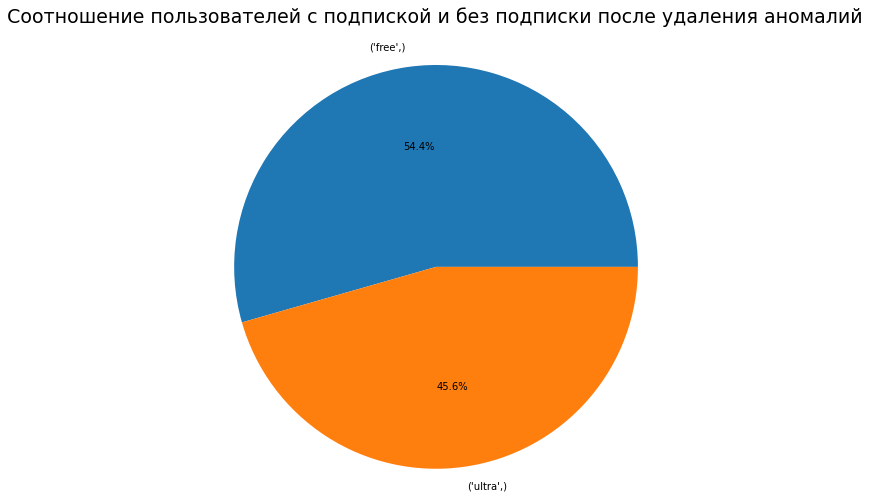

In [ ]:
# проверим, изменилось ли соотношение пользователей с подпиской и без нее
subscription_types = df_full.pivot_table(index='user_id', values = 'subscription_type', aggfunc='min').value_counts()
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(subscription_types, labels=subscription_types.index, autopct='%1.1f%%')
plt.title('Cоотношение пользователей с подпиской и без подписки после удаления аномалий'+ "\n", fontsize=19)
plt.axis('equal')
plt.show()

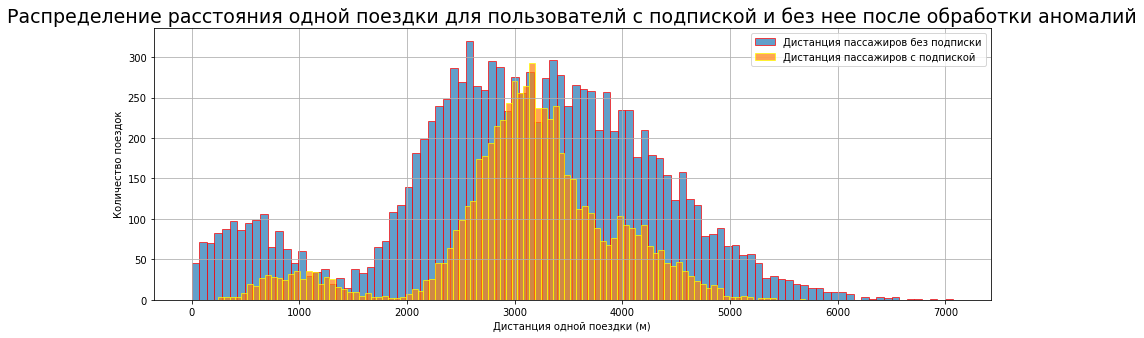

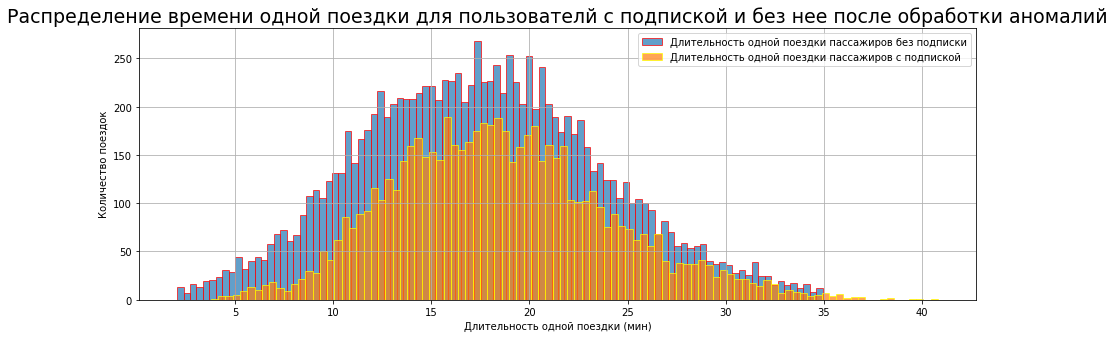

In [ ]:
# построим повторно две скомпонованные гистограммы распределения дистанции поездок для пользователей с подпиской и без нее
plt.figure(figsize=(15, 5))
free_sub['distance'].hist(label='Дистанция пассажиров без подписки', bins=100, alpha=.7, edgecolor='red')
ultra_sub['distance'].hist(label='Дистанция пассажиров с подпиской', bins=100, alpha=.7, edgecolor='yellow')
plt.title('Распределение расстояния одной поездки для пользователй с подпиской и без нее после обработки аномалий', fontsize=19)
plt.xlabel('Дистанция одной поездки (м)')
plt.ylabel('Количество поездок')
plt.legend()
plt.show()

# построим повторно две скомпонованные гистограммы распределения времени одной поездки для пассажиров с подпиской и без нее
plt.figure(figsize=(15, 5))
free_sub['duration'].hist(label='Длительность одной поездки пассажиров без подписки', bins=100, alpha=.7, edgecolor='red')
ultra_sub['duration'].hist(label='Длительность одной поездки пассажиров с подпиской', bins=100, alpha=.7, edgecolor='yellow')
plt.title('Распределение времени одной поездки для пользователй с подпиской и без нее после обработки аномалий', fontsize=19)
plt.xlabel('Длительность одной поездки (мин)')
plt.ylabel('Количество поездок')
plt.legend()
plt.show()

Теперь данные выглядят адекватно, рассматриваемые ранее показатели (возраст, соотношение пользователей с подпиской и без нее) не изменились, при этом у пользователей без подписки все еще есть показатели дистанции и времени в районе 0, которые теперь, однако, выглядят более реалистично.

Можно предположить, что отличие связано с отсутствием у пользователей без подписки опыта аренды самокатов, более частым изменением планов его использования (на это может повлиять, например, отсутствие станций в конечной точке их маршрута). Тогда как пользователи с подпиской, вероятно, более опытны, знают расположение станций, где можно оставить самокат, они менее склонны к изменению планов по его использованию.

### Подсчёт выручки

#### Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [ ]:
# округлим продолжительность каждой поездки
df_full['duration'] = np.ceil(df_full['duration'])

# создадим датафрейм с агрегированными данными
aggregated_data = df_full.pivot_table(
    index = ['user_id', 'month_ride'],
    values = ['subscription_type', 'name','distance', 'duration', 'minute_price', 'start_ride_price','subscription_fee'],
    aggfunc = {'subscription_type': 'min',
               'name':'count',
               'distance' : 'sum',
               'duration' : 'sum',
               'minute_price' : 'first',
               'start_ride_price':'first',
               'subscription_fee':'first'})
aggregated_data.rename(columns = {'name' : 'rides_num'}, inplace = True)
aggregated_data.head(10)

distance  duration  minute_price  rides_num  \
user_id month_ride                                                    
1       1            7027.511294      42.0             6          2   
        4             754.159807       7.0             6          1   
        8            6723.470560      46.0             6          2   
        10           5809.911100      32.0             6          2   
        11           7003.499363      56.0             6          3   
        12           6751.629942      28.0             6          2   
2       3           10187.723006      63.0             6          3   
        4            6164.381824      40.0             6          2   
        6            3255.338202      14.0             6          1   
        7            6780.722964      48.0             6          2   

                    start_ride_price  subscription_fee subscription_type  
user_id month_ride                                                        
1       1                          0               199             ultra  
        4                          0               199             ultra  
        8                          0               199             ultra  
        10                         0               199             ultra  
        11                         0               199             ultra  
        12                         0               199             ultra  
2       3                          0               199             ultra  
        4                          0               199             ultra  
        6                          0               199             ultra  
        7                          0               199             ultra

#### В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь:

In [ ]:
# напишем функцию для расчета месячной выручки с каждого пользователя
def monthly_revenues(row):
    duration = row['duration']
    rides_num = row['rides_num']
    start_ride_price = row['start_ride_price']
    subscription_fee = row['subscription_fee']
    minute_price = row['minute_price']

    revenue = start_ride_price*rides_num + subscription_fee + minute_price*duration

    return revenue

# запишем получившуюся помесячную выручку в столбец monthly_revenue
aggregated_data['monthly_revenue'] = aggregated_data.apply(monthly_revenues, axis=1)

display(aggregated_data)

distance  duration  minute_price  rides_num  \
user_id month_ride                                                    
1       1            7027.511294      42.0             6          2   
        4             754.159807       7.0             6          1   
        8            6723.470560      46.0             6          2   
        10           5809.911100      32.0             6          2   
        11           7003.499363      56.0             6          3   
...                          ...       ...           ...        ...   
1534    6            3409.468534      26.0             8          2   
        8            7622.453034      48.0             8          2   
        9            4928.173852      23.0             8          1   
        11          13350.015305      78.0             8          4   
        12           2371.711192      16.0             8          1   

                    start_ride_price  subscription_fee subscription_type  \
user_id month_ride                                                         
1       1                          0               199             ultra   
        4                          0               199             ultra   
        8                          0               199             ultra   
        10                         0               199             ultra   
        11                         0               199             ultra   
...                              ...               ...               ...   
1534    6                         50                 0              free   
        8                         50                 0              free   
        9                         50                 0              free   
        11                        50                 0              free   
        12                        50                 0              free   

                    monthly_revenue  
user_id month_ride                   
1       1                     451.0  
        4                     241.0  
        8                     475.0  
        10                    391.0  
        11                    535.0  
...                             ...  
1534    6                     308.0  
        8                     484.0  
        9                     234.0  
        11                    824.0  
        12                    178.0  

[11300 rows x 8 columns]

### Шаг 6. Проверка гипотез

#### Проверим гипотезу: тратят ли пользователи с подпиской больше времени на поездки?

***Сформулируем нулевую и альтернативную гипотезы:***

H0 (нулевая гипотеза): Пользователи с подпиской тратят столько же времени на поездки, сколько и пользователи без подписки.

H1 (альтернативная гипотеза): Пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.

In [ ]:
# задаем уровень статистической значимости
alpha = 0.05
print(f'Уровень статистической значимости: {alpha}')

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(ultra_sub['duration'], free_sub['duration'], alternative='greater')

print(f"Среднее значение для пользователей с подпиской: {ultra_sub['duration'].mean():.2f}")
print(f"Среднее значение для пользователей без подписки: {free_sub['duration'].mean():.2f}")

print(f'p-value: {results.pvalue}')

# проверяем p-value
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

Уровень статистической значимости: 0.05
Среднее значение для пользователей с подпиской: 18.54
Среднее значение для пользователей без подписки: 17.53
p-value: 4.704468074453899e-28
Отвергаем нулевую гипотезу


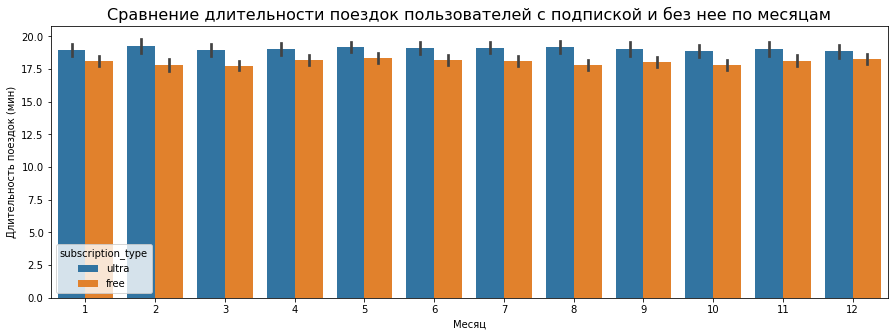

In [ ]:
# построим гистограмму для сравнения помесячно длительности поездок пользователей с подпиской и без нее
plt.figure(figsize=(15, 5))
plt.title('Сравнение длительности поездок пользователей с подпиской и без нее по месяцам', fontsize=16)
sns.barplot(x = "month_ride",
            y = "duration",
            data = df_full,
            hue = "subscription_type")
plt.xlabel('Месяц')
plt.ylabel('Длительность поездок (мин)');

Проверка гипотезы и гистограмма дают основания полагать, что пользователи с подпиской тратят на поездки больше времени, чем пользователи без подписки.

#### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверим данную гипотезу.

***Сформулируем нулевую и альтернативную гипотезы:***

H0 (нулевая гипотеза): Пользователи с подпиской за одну поездку проезжают 3130 м.

H1 (альтернативная гипотеза): Пользователи с подпиской за одну поездку проезжают больше 3130 м.

In [ ]:
optimal_value = 3130

# задаем уровень статистической значимости
alpha = 0.05
print(f'Уровень статистической значимости: {alpha}')

# проверяем одностороннюю гипотезу
result = st.ttest_1samp(ultra_sub['distance'], optimal_value ,alternative='greater')

print(f"Среднее значение: {ultra_sub['distance'].mean():.2f}")
print('p-value:', result.pvalue)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Уровень статистической значимости: 0.05
Среднее значение: 3115.45
p-value: 0.9195368847849785
Не отвергаем нулевую гипотезу


Не удалось отвергнуть нулевую гипотезу, а значит можно утверждать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.

#### Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

In [ ]:
revenue_ultra = aggregated_data[aggregated_data['subscription_type'] == "ultra"]
revenue_free = aggregated_data[aggregated_data['subscription_type'] == "free"]

In [ ]:
print(f'H0 (нулевая гипотеза): Помесячная выручка от пользователей с подпиской равна помесячной выручке от пользователей без подписки.')
print(f'H1 (альтернативная гипотеза): Помесячная выручка от пользователей с подпиской больше помесячной выручки от пользователей без подписки.')

# задаем уровень статистической значимости
alpha = 0.05
print(f'Уровень статистической значимости: {alpha}')

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(revenue_ultra['monthly_revenue'], revenue_free['monthly_revenue'], alternative='greater')

print(f"Среднее значение для пользователей с подпиской: {revenue_ultra['monthly_revenue'].mean():.2f}")
print(f"Среднее значение для пользователей без подписки: {revenue_free['monthly_revenue'].mean():.2f}")
print(f'p-value: {results.pvalue}')

# проверяем p-value
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

H0 (нулевая гипотеза): Помесячная выручка от пользователей с подпиской равна помесячной выручке от пользователей без подписки.
H1 (альтернативная гипотеза): Помесячная выручка от пользователей с подпиской больше помесячной выручки от пользователей без подписки.
Уровень статистической значимости: 0.05
Среднее значение для пользователей с подпиской: 362.79
Среднее значение для пользователей без подписки: 329.33
p-value: 2.0314113674863288e-30
Отвергаем нулевую гипотезу


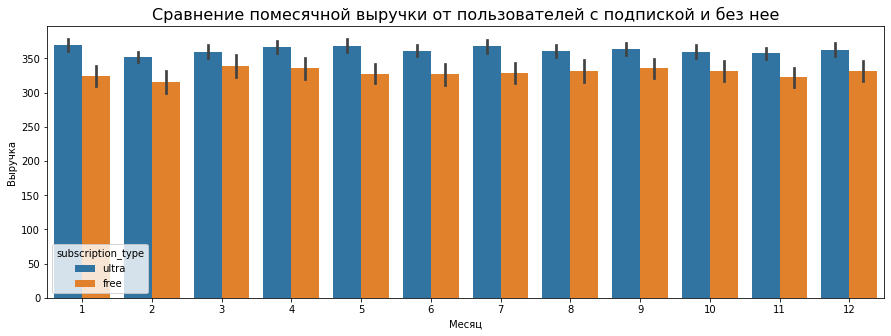

In [ ]:
# построим гистограмму для сравнения помесячной выручки от пользователей с подпиской и без нее
plt.figure(figsize=(15, 5))
plt.title('Сравнение помесячной выручки от пользователей с подпиской и без нее', fontsize=16)

aggregated_data_reset = aggregated_data.reset_index()

sns.barplot(x="month_ride",
            y="monthly_revenue",
            data=aggregated_data_reset,
            hue="subscription_type")

plt.xlabel('Месяц')
plt.ylabel('Выручка')

plt.show()

Таким образом, можно предполагать, что помесячная выручка от пользователей с подпиской больше помесячной выручки от пользователей без подписки.

### Шаг 7. Распределения

#### Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

In [ ]:
# Задаем параметры биномиального распределения
n = 1160
p = 0.1

# Задаем значение k
k = 100

# Вычисляем вероятность
probability = st.binom.cdf(k-1, n, p)

print(f'Если разослать {n} промокодов, то вероятность не выполнить план в 100 подписок равна {probability:.2%}')

Если разослать 1160 промокодов, то вероятность не выполнить план в 100 подписок равна 5.07%


Соответственно нужно разослать не меньше 1160 промокодов.

#### Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более  399,5 тыс. пользователей.

In [ ]:
# задаём параметры биномиального распределения
n = 1000000
p = 0.4

# задаём параметры нормального распределения равными
# мат.ожиданию и дисперсии биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))

# задаём нормальное распределение
distr = st.norm(mu, sigma)

# считаем вероятность хвоста слева от 399,5 тыс
result = distr.cdf(399500)
print(f'Вероятность того, что если разослать 1 млн уведомлений, их откроют не более 399,5 тыс. пользователей, равна {result:.2%}')

Вероятность того, что если разослать 1 млн уведомлений, их откроют не более 399,5 тыс. пользователей, равна 15.37%


### Общий вывод

В проведенном исследовании нами были изучены данные о некоторых пользователях из нескольких городов сервиса аренды самокатов GoFast. В нашем распоряжении было 3 датасета - с данными о пользователях, с данными о поездках и датасет с условиями аренды при наличии подписки и без нее.

**На этапе исследовательского анализа данных были рассмотрены параметры датасетов:**

* Частота встречаемости городов. Всего в нашей выборке представлено 8 городов: Краснодар, Сочи, Омск, Тюмень, Москва, Пятигорск, Екатеринбург, Ростов-на-Дону. Больше всего в выборке представлено пользователей из Пятигорска,а меньше всего - из  Москвы.
* Соотношение пользователей с подпиской и без подписки. Пользователей с подпиской (45.6%) оказалось на 10% меньше, чем пользователей без подписки (54.4%).
* Распределение возрастов пользователей. Самому младшему пользователю в нашей выборке 12 лет, самому старшему - 43 года. Средний возраст пользователей - 25 лет.
* Распределение расстояния одной поездки. В среднем пользователи проезжают около 3 километров за одну поездку, при этом на гистограмме виден отдельный небольшой пик в районе 0.5 - 1 км, что может свидетельствовать о двух группах поездок в нашей выборке: коротких и средних. Четко выраженной группы дальних поездок выделить нельзя.
* Распределение продолжительности поездок. В среднем продолжительность аренды составляет 18 минут, большинство поездок находятся в пределах 13 - 22 минут.

**Изучив параметры данных совместно для пользователей с подпиской и без подписки, мы разделили эти категории и сравнили следующие характеристики:**

* Распределение расстояния одной поездки. Мы выяснили, что распределения дистанций пользователей с подпиской и без нее отличаются. Пользователи без подписки чаще совершают очень короткие (до 500 м) и очень длинные (свыше 5 км) поездки. Нами было сделано предположение, что такое различие объясняется тем, что поездки пользователей без подписки в большинстве случаев ситуативные (туристическа прогулка, отдых/досуг), тогда как пользователи, имеющие подписку, используют самокаты повседневно для поездок по запланированным (часто одним и тем же) маршрутам (поездки на работу / на учебу). Таким образом, разброс дистанции у пользователей без подписки становится больше, чем у пользователей с подпиской.
* Распределение времени одной поездки. Распределения времени поездок двух сравниваемых категорий пользователей похожи. Однако мы заметили одно четко выраженное различие. Среди пользователей без подписки была большая доля поездок, время которых составляло меньше 3 минут, а преодоленное расстояние больше 3 км.Тогда как у пользователей с подпиской таких поездок нет. Такие данные выглядят как аномалии и противоречат действительности. Скорее всего в работе программного обеспечения сервиса есть ошибка.
* Исключив аномалию, можно заметить, что у пользователей без подписки все еще остаются показатели дистанции и времени в районе 0. При этом выглядят они теперь более достоверно. Наше предположение в данном случае такое: отличие связано с отсутствием у пользователей без подписки опыта аренды самокатов, более частым изменением планов его использования сразу после оформления аренды. Такое поведение и сформировало ультракороткие поездки у пользователей без подписки.

**В исследовании также были проверены три гипотезы:**

1) *Тратят ли пользователи с подпиской больше времени на поездки, чем пользователи без подписки.*

  ***В данном случае t-test показал, что есть основания полагать, что пользователи с подпиской тратят на поездки больше времени, чем пользователи без подписки.***

2) *Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?*

 ***Нулевую гипотезу в данном случае отвергнуть не удалось, а значит можно утверждать, что дистанция пользователей с подпиской за одну поездку не превышает 3130 метров.***


3) *Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.*
  
  ***Результат проверки данной гипотезы показал, что, вероятно, помесячная выручка от пользователей с подпиской по месяцам будет выше, чем выручка от пользователей без подписки.***